In [1]:
#Initializing
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import math
import scipy
import sklearn
import time

from sklearn import linear_model
from sklearn import neighbors
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


#Loading Data
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/heart.csv')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = df.drop('target', 1)
Y = df['target']

--- 0.06569910049438477 seconds ---


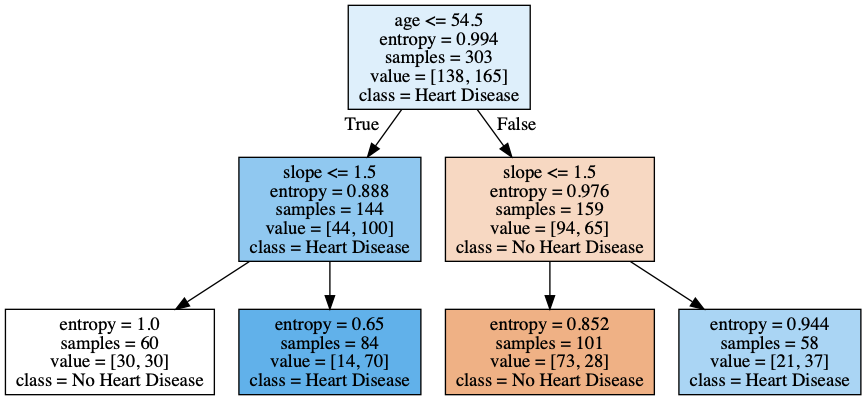

In [28]:
#Decision Tree Model
start_time = time.time()

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=2
)
decision_tree.fit(X, Y)


# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)

print("--- %s seconds ---" % (time.time() - start_time))
Image(graph.create_png())



In [29]:
# Random Forest Model

start_time = time.time()

rfc = ensemble.RandomForestClassifier()
print(cross_val_score(rfc, X, Y, cv=10))

print("--- %s seconds ---" % (time.time() - start_time))

[0.77419355 0.83870968 0.93548387 0.90322581 0.87096774 0.7
 0.83333333 0.83333333 0.75862069 0.82758621]
--- 0.1525580883026123 seconds ---
